# Tensors

In [1]:
import numpy as np
import torch

In [6]:
# Tensor initlization
## Tensor can be intialized in various ways
### Directly from data

data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
print(f"The X_data is: {x_data}")

### From a NumPy array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(f"\nThe x_np is: {x_np}")

### From another tensor
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"\nOnes Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

### With random or constant values
shape = (2, 3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor} \n")

The X_data is: tensor([[1, 2],
        [3, 4]])

The x_np is: tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.4417, 0.0865],
        [0.4058, 0.1159]]) 

Random Tensor: 
 tensor([[0.7397, 0.6897, 0.7840],
        [0.4762, 0.0311, 0.8376]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 



In [7]:
# Tensor attributes
tensor = torch.rand(3, 4)
print(f"Shape  of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape  of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [9]:
# Tensor operations
## Over 100 tensor operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random sampling and more are comprehensively described.
### Each of them can be run on the GPU (at typically higher speed than on a CPU). 
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
    print(f"Device tensor is stored on: {tensor.device}")

In [15]:
# Standard numpy-like indexing and slicing
tensor = torch.ones(4, 4)
tensor[:,1] = 0 # All rows, 2nd column
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [16]:
# Joining tensors, you can use `torch.cat` to concatenate a sequence of tensors along a given dimension.
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [17]:
# Multiplying tensors
# this computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")

# Alternative syntax
print(f"tensor * tensor \n {tensor * tensor}")

# This computes the matrix multiplication between two tensors
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax
print(f"tensor @ tensor.T \n {tensor @ tensor.T}\n")

# In-place operation, Operations that have a `_` suffix are in-place. For example: `x.copy_(y)`, `x.t_()`, will change `x`.
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [18]:
# Tensor to NumPy array
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

# A change in the tensor reflects in the NumPy array.
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [19]:
# Numpy array to tensor
n = np.ones(5)
t = torch.from_numpy(n)

# Changes in the NumPy array reflects in the tensor.
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


# Introduction to `torch.autograd`

# Introduction to `torch.autograd`

`torch.autograd` is PyTorch's automatic differentiation engine that powers neural network training.

### Background:

Neural networks (NNs) are a collection of nested functions that are executed on some input data. These functions are defined by parameters (consisting of weights and biases), which in PyTorch are stored in tensors.

Training a NN happens in two steps:

1. *Forward Propagation*: In forward prop, the NN makes it's best guess about the correct output. It runs the input data through each of it's functions to make this guess.

2. *Backward Propagation*: In backprop, the NN adjusts its parameters proportionate to the error in it's guess/ It does this by traversing backwards from the output, collecting the derivatives of the error with respect to the parameters of the functions (gradients), and optimizing the parameters using gradient descent.

In [22]:
import torch
from torchvision.models import resnet50, ResNet18_Weights

model = resnet50(weights=ResNet18_Weights)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

c:\Users\Vishal\Github\PyTorch-Grind\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\Vishal/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:14<00:00, 6.91MB/s]


In [23]:
prediction = model(data) # forward pass

In [24]:
# calculate the loss 
loss = (prediction - labels).sum()
loss.backward() # backward pass

In [25]:
# Optimizer
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [26]:
# Gradient Descent
optim.step()

# Neural Networks

Neural Networks can be constructed using the `torch.nn` package.

A Typical training procedure for a neural network is as follows:

1. Define the neural network that has some learnable parameters (or weights)
2. Iterate over a dataset of inputs
3. Process input through the network
4. Compute the loss (how far is the output from being correct)
5. Propagate gradients back into the network's parameters
6. Update the weights of the network, typically using a simple update rule: `weight = weight - learning_rate * gradient`

In [27]:
# Define the network

import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolutions
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # 5x5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, input):
        # Convolutional layer C1: 1 input image channel, 6 output channels,
        # 5 x 5 square convolution, it uses RELU activation function, and
        # outputs a Tensor with size (N, 6, 28, 28), where N is the size of the batch
        c1 = F.relu(self.conv1(input))
        # Subsampling layer S2: 2x2 grid, purely functional
        # this layer does not have any parameter, and outputs a (N, 6, 14, 14) Tensor
        s2 = F.max_pool2d(c1, (2, 2))
        # Convolutional layer C3: 6 input channels, 16 output channels,
        # 5x5 square convolution, it uses RELU activation function, and
        # outputs a Tensor with size (N, 16, 10, 10) 
        c3 = F.relu(self.conv2(s2))
        # Subsampling layer S4: 2x2 gird, purely functional,
        # this layer does not have any parameter, and outputs a (N, 16, 5, 5) Tensor
        s4 = F.max_pool2d(c3, 2)
        # Flatten operation: purely functional, outputs a (N, 400) Tensor
        s4 = torch.flatten(s4, 1)
        # Fully connected layer F5: (N, 400) Tensor input,
        # and outputs a (N, 120) Tensor, it uses a RELU activation function
        f5 = F.relu(self.fc1(s4))
        # Fully connected layer F5: (N,400) Tensor input,
        # and outputs a (N, 84) Tensor, it uses a RELU activation function
        f6 = F.relu(self.fc2(f5))
        # Gaussian layer OUTPUT: (N, 84) Tensor input and 
        # Ouputs a (N, 10) tensor
        output = self.fc3(f6)
        return output
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [28]:
# Now we just have to define the forward function and the backward function 
# (where gradients are computed) is automatically defined for you using autograd.

# The learnable parameters of a model are returned by `net.parameters()`
params = list(net.parameters())
print(len(params))
print(params[0].size()) # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [29]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.1401, -0.0887, -0.0390, -0.0222,  0.0978,  0.0011,  0.1091, -0.1168,
         -0.0153,  0.0823]], grad_fn=<AddmmBackward0>)


In [30]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [31]:
# Loss function
# A loss function takes the (output, target) pair of inputs, and computes a value that
# estimates how far away the output is from the target.

output = net(input)
target = torch.randn(10) # a dummy target, for example
target = target.view(1, -1) # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.5418, grad_fn=<MseLossBackward0>)


In [32]:
print(loss.grad_fn) # MSELoss
print(loss.grad_fn.next_functions[0][0]) # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0]) # ReLU

In [33]:
# Backprop
# To backpropagate the error all we have to do is to `loss.backward()`.

net.zero_grad() # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()
print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([ 0.0042,  0.0106, -0.0106, -0.0153, -0.0126, -0.0059])


In [34]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [35]:
# or simply use the optimizer
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad() # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() # Does the update

# Training a classifier

## What about data?
Generally, when you have to deal with image, text, audio or video data, you can use standard python packages that load data into a numpy array. Then you can convert this array into a `torch.*Tensor`.

- For images, packages such as Pillow, OpenCV are useful
- For audio, packages such as scipy and librosa
- For text, either raw Python or Cython based loading, or NLTK and SpaCy are useful


## Training an Image Classifier

We will do the following steps in order:
1. Load and normalize the CIFAR10 training and test datasets using `torchvision`
2. Define a Convolutional Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

In [97]:
# Load and normalize CIFAR10

import torch
import torchvision
import torchvision.transforms as transforms

In [98]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


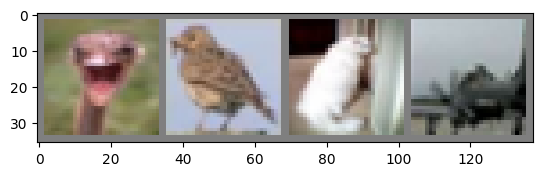

bird  bird  cat   plane


In [99]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [100]:
# Define a Convolutional Neural Network
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [101]:
# Define a loss function and optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [102]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.185
[1,  4000] loss: 1.835
[1,  6000] loss: 1.654
[1,  8000] loss: 1.577
[1, 10000] loss: 1.531
[1, 12000] loss: 1.475
[2,  2000] loss: 1.383
[2,  4000] loss: 1.364
[2,  6000] loss: 1.358
[2,  8000] loss: 1.323
[2, 10000] loss: 1.296
[2, 12000] loss: 1.288
Finished Training


In [103]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

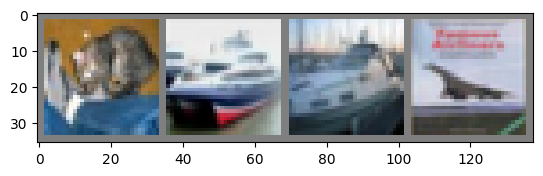

GroundTruth:  cat   ship  ship  plane


In [104]:
# Test the network on the test data
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [105]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [106]:
outputs = net(images)

In [107]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'for j in range(4)))

Predicted:  cat   plane ship  plane


In [108]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 54 %


In [109]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 69.9 %
Accuracy for class: car   is 57.1 %
Accuracy for class: bird  is 36.7 %
Accuracy for class: cat   is 38.4 %
Accuracy for class: deer  is 34.6 %
Accuracy for class: dog   is 45.6 %
Accuracy for class: frog  is 69.8 %
Accuracy for class: horse is 70.4 %
Accuracy for class: ship  is 63.1 %
Accuracy for class: truck is 62.2 %


# Above results are horriable, FIX IT!

# EDIT: Fixed it!